# Goal: Access data and visualize / plot it. Get familiar with ERA5 data.



## Usefull links:

* https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5
* https: // confluence.ecmwf.int / display / CKB / How + to + download + ERA5
* https: // confluence.ecmwf.int / display / CKB / ERA5 % 3
A + data + documentation
* https: // cds.climate.copernicus.eu /  #!/home
* https: // towardsdatascience.com / read - era5 - directly - into - memory -
with-python - 511a2740bba0

In [53]:
import cdsapi
import pygrib as pygrib

In [54]:
api_keyfile = open(".cdsapirc", "r")
lines = api_keyfile.readlines()
url = lines[0].rstrip().replace("url: ", "")
key = lines[1].rstrip().replace("key: ", "")

In [55]:
cdsapi_clinet = cdsapi.Client(url, key)

cdsapi_clinet.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'sea_surface_temperature',
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            90, -180, -90,
            180,
        ],
        'format': 'grib',
    },
    'ERA5_downloads/ERA5_SST.grib')

/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-14 17:30:27,445 INFO Welcome to the CDS
2023-01-14 17:30:27,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-14 17:30:27,722 INFO Request is queued
/opt/homebrew/Caskroom/miniforge/base/envs

Result(content_length=13200243840,content_type=application/x-grib,location=https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1673713827.910426-17167-9-41814a11-42ed-4eb0-b55b-412bb5a83ace.grib)

In [56]:
grbs = pygrib.open("ERA5_downloads/ERA5_SST.grib")

In [57]:
grbs

In [58]:
grb = grbs.select()[0]
data = grb.values

In [59]:
data.data

array([[ 271.46044922,  271.46044922,  271.46044922, ...,  271.46044922,
         271.46044922,  271.46044922],
       [ 271.46044922,  271.46044922,  271.46044922, ...,  271.46044922,
         271.46044922,  271.46044922],
       [ 271.46044922,  271.46044922,  271.46044922, ...,  271.46044922,
         271.46044922,  271.46044922],
       ...,
       [9999.        , 9999.        , 9999.        , ..., 9999.        ,
        9999.        , 9999.        ],
       [9999.        , 9999.        , 9999.        , ..., 9999.        ,
        9999.        , 9999.        ],
       [9999.        , 9999.        , 9999.        , ..., 9999.        ,
        9999.        , 9999.        ]])

# New Approach

In [60]:
import pygrib

In [61]:
grbs = pygrib.open('ERA5_downloads/ERA5_GOM_SST_subset.grib')

In [62]:
grbs.seek(0)
#grb = grbs[1]   #grib messages start at index 1!!
grb = grbs.read(1)[0]
grb

1:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001010000

In [63]:
type(grb)

pygrib._pygrib.gribmessage

In [64]:
grbs.tell()

1

In [65]:
grb.values

masked_array(
  data=[[--, --, --, ..., 294.55224609375, 294.46044921875,
         294.51123046875],
        [--, --, --, ..., 294.35888671875, 294.38720703125,
         294.43896484375],
        [--, --, --, ..., 294.40380859375, 294.37646484375,
         294.37158203125],
        ...,
        [--, --, --, ..., 295.56005859375, 295.50537109375,
         295.58056640625],
        [--, --, --, ..., 295.52099609375, 295.46630859375,
         295.49267578125],
        [--, --, --, ..., 295.45947265625, 295.39306640625,
         295.42626953125]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=9999.0)

In [66]:
lats, lons = grb.latlons()

In [67]:
lats.shape

(37, 297)

In [68]:
lats.min()

22.0

In [69]:
lats.max()

31.0

In [70]:
lons.shape

(37, 297)

In [71]:
lons.min()

-100.0

In [72]:
lons.max()

-26.0

# ERA 5 Test

In [32]:
import cdsapi
import pygrib
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
api_keyfile = open(".cdsapirc", "r")
lines = api_keyfile.readlines()
url = lines[0].rstrip().replace("url: ", "")
key = lines[1].rstrip().replace("key: ", "")

In [5]:
c = cdsapi.Client(url, key)
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'sea_surface_temperature',
        'year': '2020',
        'month': [
            '01', '02',
        ],
        'day': [
            '01', '10', '20',
        ],
        'time': [
            '00:00', '06:00', '12:00',
            '18:00',
        ],
        'area': [
            31, -100, 22,
            -26,
        ],
        'format': 'grib',
    },
    'ERA5_downloads/ERA5_GOM_SST_subset.grib')

/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-13 16:09:56,760 INFO Welcome to the CDS
2023-01-13 16:09:56,760 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-01-13 16:09:56,861 INFO Request is queued
/opt/homebrew/Caskroom/miniforge/base/envs

Result(content_length=518400,content_type=application/x-grib,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data4/adaptor.mars.internal-1673622597.1382678-21199-10-a539fc96-4ea3-4152-9e3d-01429d71f110.grib)

In [7]:
ds = xr.open_dataset('ERA5_downloads/ERA5_GOM_SST_subset.grib', engine='cfgrib')

In [8]:
ds

<xarray.Dataset>
Dimensions:     (time: 24, latitude: 37, longitude: 297)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2020-01-01 ... 2020-02-20T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 31.0 30.75 30.5 30.25 ... 22.5 22.25 22.0
  * longitude   (longitude) float64 -100.0 -99.75 -99.5 ... -26.5 -26.25 -26.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-01-13T16:12 GRIB to CDM+CF via cfgrib-0.9.1...

Somehow this does not show up on bigger dataset!

In [9]:
t0_ds = ds.isel(time=0) #Select by index --> data of first temestamp

In [10]:
t0_ds

<xarray.Dataset>
Dimensions:     (latitude: 37, longitude: 297)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2020-01-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 31.0 30.75 30.5 30.25 ... 22.5 22.25 22.0
  * longitude   (longitude) float64 -100.0 -99.75 -99.5 ... -26.5 -26.25 -26.0
    valid_time  datetime64[ns] 2020-01-01
Data variables:
    sst         (latitude, longitude) float32 nan nan nan ... 295.5 295.4 295.4
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-01-13T16:12 GRIB to CDM+CF via cfgrib-0.9.1...

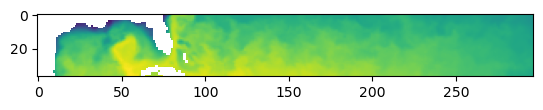

In [14]:
plt.imshow(t0_ds.sst)

TODO: make better print!!

# Second way to read data

In [17]:
grbs = pygrib.open('ERA5_downloads/ERA5_GOM_SST_subset.grib')

In [18]:
grbs.seek(0)

In [19]:
for grb in grbs:
    print(grb)

1:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001010000
2:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001010600
3:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001011200
4:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001011800
5:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001100000
6:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001100600
7:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001101200
8:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001101800
9:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001200000
10:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001200600
11:Sea su

In [21]:
grbs.seek(0)

In [22]:
grb = grbs[1]   #grib messages start at index 1!!

In [24]:
grb

1:Sea surface temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202001010000

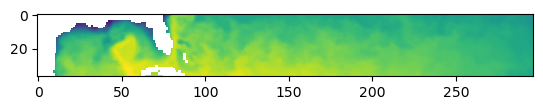

In [25]:
plt.imshow(grb.values)

In [33]:
lats, lons = grb.latlons()

In [46]:
lat_W = -100
lat_E = -26
lon_N = 31
lon_S = 22

In [47]:
#TODO: Adopt values!!
map_crs = ccrs.LambertConformal(central_longitude = -63,
                                central_latitude=-26,
                                standard_parallels=(50,50))

In [48]:
data_crs = ccrs.PlateCarree()

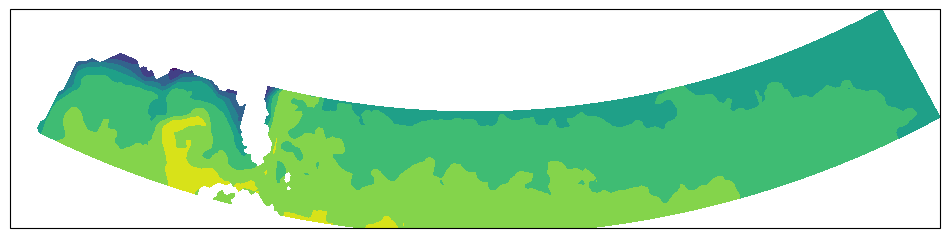

In [51]:
fig = plt.figure(1, figsize=(12,12))
ax = plt.subplot(1,1,1,projection=map_crs)
ax.set_extent([lat_W, lat_E, lon_S, lon_N], data_crs)   #  West, East, South, North
#ax.add_features(cfeature.COASTLINE.with_scale("50m"))
#ax.add_features(cfeature.STATES.with_scale("50m"))

ax.contourf(lons, lats, grb.values, transform=data_crs)